In [3]:
# Produce figure 1, phase portrait of Antonovsky model from Cantin2020
using DrWatson
using Distributions
using Random
using Plots
using ChaosTools

include(joinpath(srcdir(), "one_forest_system.jl"))

antonovsky_sym_jacob

In [4]:
# Define parameters
ρ = 4.2
f = 1
h = 2

# Determine number of timesteps and initial states
T = 100
n_initial_points = 50
n_states = 2

# Create initial states
rng = MersenneTwister(42)
u0s = rand(rng, Uniform(0, 5), (n_initial_points, n_states))

50×2 Matrix{Float64}:
 2.66592    2.22915
 2.27015    0.489166
 0.0884341  3.25927
 0.864665   1.14478
 4.79463    4.47943
 4.86783    1.71643
 1.51935    2.78997
 0.884543   2.68181
 4.78458    4.40095
 2.92142    2.9313
 4.68733    2.90594
 0.80003    2.27996
 2.11478    2.65237
 ⋮          
 4.20821    2.68111
 3.0775     1.2126
 1.32213    0.710221
 4.1657     4.29023
 4.04772    3.82557
 1.05139    1.94197
 2.80723    4.33158
 0.228651   0.63171
 4.54489    4.74299
 3.03665    2.15483
 4.9828     0.96873
 2.30616    3.82116

In [6]:
## symbolic jacobian for antonvosky model
# antonovsky_sym_jacob()

In [7]:
# Numerically calculate fixed points
low = interval(0, 5)
high = interval(0, 5)
box = low × high
ds = one_forest_system(u0s[1, :]; ρ = ρ, f = f, h = h)

fps, eigs, stable = fixedpoints(ds, box, antonovsky_jacob)

┌ Warning: Non-unique fixed points found!
└ @ ChaosTools ~/.julia/packages/ChaosTools/VMXUY/src/stability/fixedpoints.jl:104


(2-dimensional StateSpaceSet{Float64} with 3 points, Vector{ComplexF64}[[-4.301091083023375 + 0.0im, 0.20109108302337475 + 0.0im], [-3.6429811473877054 + 0.0im, -0.45701885261229513 + 0.0im], [-4.609502310972899 + 0.0im, -0.39049768902710125 + 0.0im]], Bool[0, 1, 1])

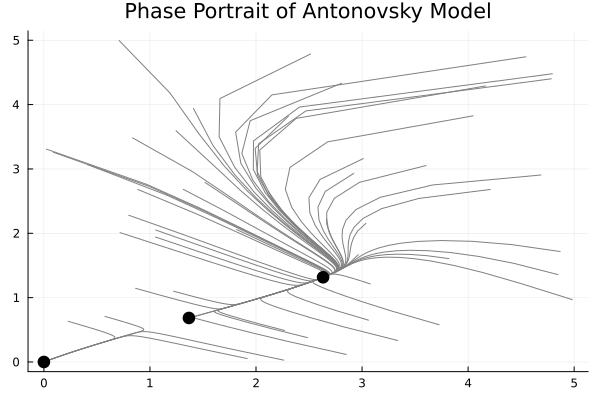

In [8]:
# Iterate through initial states and create phase portrait
nrows = size(u0s)[1]
P = plot(title = "Phase Portrait of Antonovsky Model", legend = false)
for i in 1:nrows
    ds = one_forest_system(u0s[i,:], ρ = ρ, f = f, h = h)
    trajectory_ds = trajectory(ds, T)
    X, _ = trajectory_ds
    young_tree_density, old_tree_density = X[:, 1], X[:, 2]
    plot!(P, young_tree_density, old_tree_density, color = :grey)
end
scatter!([fps[1, 1]], [fps[1, 2]], markersize = 7, markercolor=:black)
scatter!([fps[2, 1]], [fps[2, 2]], markersize = 7, markercolor=:black)
scatter!([fps[3, 1]], [fps[3, 2]], markersize = 7, markercolor=:black)
display(P)

In [9]:
function interpret_eigenvalues(eigs)
    for i in 1:size(eigs)[1]
        eigenvalues = eigs[i, :]
        
        # Check if the eigenvalues are complex or real
        if isreal(eigenvalues[1]) && isreal(eigenvalues[2])
            # Real eigenvalues
            if sign(eigenvalues[1]) == sign(eigenvalues[2])
                # Eigenvalues have same sign
                if eigenvalues[1] < 0
                    println("Fixed point $i is a stable node.")
                else
                    println("Fixed point $i is an unstable node.")
                end
            else
                # Eigenvalues have different signs
                println("Fixed point $i is a saddle point.")
            end
        else
            # Complex eigenvalues
            if real(eigenvalues[1]) < 0
                println("Fixed point $i is a stable spiral.")
            else
                println("Fixed point $i is an unstable spiral.")
            end
        end
    end
end

# Call the function with your eigenvalues
interpret_eigenvalues(eigs)

LoadError: BoundsError: attempt to access 1-element Vector{Vector{ComplexF64}} at index [2]